# Setup


In [2]:
!pip install ecmwflibs xarray[complete]

In [3]:
import xarray   as xr
import pandas   as pd
import numpy    as np
import datetime as dt

import getpass

## CMEMS function to get access to the thredds server

https://help.marine.copernicus.eu/en/articles/6522070-what-is-opendap-and-how-to-access-copernicus-marine-data

https://help.marine.copernicus.eu/en/articles/6135460-how-to-configure-a-simple-opendap-access-directly-in-python

https://help.marine.copernicus.eu/en/articles/5182598-how-to-consume-the-opendap-api-and-cas-sso-using-python

In [4]:
!pip install pydap

In [5]:
def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session)) #, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session)) #, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    return data_store

# Open the Thredds (OpenDAP) "channels"

In [108]:
CHL_daily = xr.open_dataset('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v6.0-DAILY')
CHL_daily

<xarray.Dataset>
Dimensions:             (lat: 4320, lon: 8640, time: 9314)
Coordinates:
  * lat                 (lat) float64 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon                 (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time                (time) datetime64[ns] 1997-09-04 ... 2023-03-31
Data variables: (12/94)
    crs                 int32 ...
    MERIS_nobs          (time, lat, lon) float32 ...
    MODISA_nobs         (time, lat, lon) float32 ...
    OLCI-A_nobs         (time, lat, lon) float32 ...
    OLCI-B_nobs         (time, lat, lon) float32 ...
    Rrs_412             (time, lat, lon) float32 ...
    ...                  ...
    water_class4        (time, lat, lon) float32 ...
    water_class5        (time, lat, lon) float32 ...
    water_class6        (time, lat, lon) float32 ...
    water_class7        (time, lat, lon) float32 ...
    water_class8        (time, lat, lon) float32 ...
    water_class9        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creation_date:                     20230416T122212Z
    creator_email:                     help@esa-oceancolour-cci.org
    ...                                ...
    time_coverage_end:                 202303302359Z
    time_coverage_resolution:          P1D
    time_coverage_start:               202303300000Z
    title:                             ESA CCI Ocean Colour Product
    tracking_id:                       c6a7f1a5-be7b-4fb6-acfa-8b7c1319a4c6
    NCO:                               netCDF Operators version 4.7.5 (Homepa...

In [122]:
CHL_monthly = xr.open_dataset('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v6.0-MONTHLY')
CHL_monthly

<xarray.Dataset>
Dimensions:             (lat: 4320, lon: 8640, time: 307)
Coordinates:
  * lat                 (lat) float64 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon                 (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time                (time) datetime64[ns] 1997-09-04 ... 2023-03-01
Data variables: (12/94)
    crs                 int32 ...
    Rrs_412             (time, lat, lon) float32 ...
    Rrs_412_bias        (time, lat, lon) float32 ...
    Rrs_412_rmsd        (time, lat, lon) float32 ...
    Rrs_443             (time, lat, lon) float32 ...
    Rrs_443_bias        (time, lat, lon) float32 ...
    ...                  ...
    MODISA_nobs_sum     (time, lat, lon) float32 ...
    OLCI-A_nobs_sum     (time, lat, lon) float32 ...
    OLCI-B_nobs_sum     (time, lat, lon) float32 ...
    SeaWiFS_nobs_sum    (time, lat, lon) float32 ...
    VIIRS_nobs_sum      (time, lat, lon) float32 ...
    total_nobs_sum      (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    time_coverage_resolution:          P1M
    time_coverage_duration:            P1M
    start_date:                        01-FEB-2023 00:00:00.000000
    stop_date:                         28-FEB-2023 23:59:00.000000
    time_coverage_start:               202302010000Z
    time_coverage_end:                 202302282359Z

## SST: OSTIA

ProductA (2012-2020):
https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/services
cmems_mod_glo_phy_my_0.083_P1D-m_202112
cmems_mod_glo_phy_my_0.083_P1M-m_202112

ProductB (2021-2022):

https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/services
cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_202211
cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m_202211

In [ ]:
USERNAME = input('Enter your username:') #afarinas
PASSWORD = getpass.getpass('Enter your password:') #Campanila8

DATASET_ID = 'cmems_mod_glo_phy_my_0.083_P1D-m'

SST12_20_daily = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SST12_20_daily = xr.open_dataset(SST12_20_daily)
SST12_20_daily

In [80]:
DATASET_ID = 'cmems_mod_glo_phy_my_0.083_P1M-m'

ALL12_20_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

ALL12_20_monthly = xr.open_dataset(ALL12_20_monthly)
ALL12_20_monthly

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 336)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
    sithick    (time, latitude, longitude) float32 ...
    siconc     (time, latitude, longitude) float32 ...
    usi        (time, latitude, longitude) float32 ...
    vsi        (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [15]:
DATASET_ID = 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m' # SST for 3D, so no surface

SST21_22_daily = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SST21_22_daily = xr.open_dataset(SST21_22_daily)
SST21_22_daily

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 1028)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-11-01T12:00:00 ... 2023-08-25T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    area:         Global
    Conventions:  CF-1.8
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      https://marine.copernicus.eu/contact
    references:   http://marine.copernicus.eu
    source:       MOI GLO12
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    institution:  Mercator Ocean International

In [74]:
DATASET_ID = 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m' # SST for 3D, so no surface

SST21_22_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SST21_22_monthly = xr.open_dataset(SST21_22_monthly)
SST21_22_monthly

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 33)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2020-11-16 ... 2023-07-16T12:00:00
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/13)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    Conventions:                   CF-1.6
    area:                          GLOBAL
    product:                       GLOBAL_ANALYSISFORECAST_PHY_001_024
    source:                        MERCATOR GLO12
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [ ]:
# NOT USED! OTHER POSSIBLE PRODUCT FOR DAILY SSH

DATASET_ID = 'cmems_mod_glo_phy_anfc_0.083deg_P1D-m'

SSH20_22_daily = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SSH20_22_daily = xr.open_dataset(SSH20_22_daily)
SSH20_22_daily

In [ ]:
# NOT USED! OTHER POSSIBLE PRODUCT FOR MONTHLY SSH

DATASET_ID = 'cmems_mod_glo_phy_anfc_0.083deg_P1M-m'

SSH20_22_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SSH20_22_monthly = xr.open_dataset(SSH20_22_monthly)
SSH20_22_monthly

In [ ]:
# NOT USED! OTHER POSSIBLE PRODUCT FOR DAILY SST FOR THE WHOLE PERIOD

DATASET_ID = 'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2'

SSH12_22_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SSH12_22_monthly = xr.open_dataset(SSH12_22_monthly)
SSH12_22_monthly


# Read sightings table with dates and positions

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('C:/Users\Andrea\Desktop\Datos Ágatha Modelo grande\Points_habitat_time_position2.csv')

#df['time'] = pd.to_datetime(df[["year", "month", "day"]])
df

,ID_Gil,lat,lon,time
0,ah_1,41.134034,-8.721601,2012-07-06 00:00:00
1,ah_2,41.127953,-8.725598,2012-07-06 00:00:00
2,ah_3,41.121816,-8.729445,2012-07-06 00:00:00
3,ah_4,41.115557,-8.732933,2012-07-06 00:00:00
4,ah_5,41.109377,-8.736653,2012-07-06 00:00:00
...,...,...,...,...
164300,ah_164301,38.150604,-19.116391,2022-08-15 00:00:00
164301,ah_164302,38.151331,-19.107464,2022-08-15 00:00:00
164302,ah_164303,38.151685,-19.098510,2022-08-15 00:00:00
164303,ah_164304,38.152520,-19.089600,2022-08-15 00:00:00


## Loop through dataframe and assign the CHL and SST values

In [54]:
#df['CHL_daily']    = np.nan
#df['CHL_monthly']    = np.nan
df['SST12_20_daily'] = np.nan
#df['SST12_20_monthly'] = np.nan
#df['SST21_22_daily'] = np.nan
#df['SST21_22_monthly'] = np.nan
#df['SSH12_20_daily'] = np.nan
#df['SSH12_20_monthy'] = np.nan
#df['SSH21_22_daily'] = np.nan
#df['SSH21_22_monthly'] = np.nan
#df['SSH12_22_daily'] = np.nan
#df['SSH12_22_monthly'] = np.nan
for i in range(0,len(df)):
  ti = df['time'][i]; lo = df['lon'][i]; la = df['lat'][i]
  #df.at[i,'CHL_daily']    =  CHL_daily.chlor_a.sel(    time=ti, lon=lo, lat=la, method='nearest').values
  #df.at[i,'CHL_monthly']    =  CHL_monthly.chlor_a.sel(    time=ti, lon=lo, lat=la, method='nearest').values
  df.at[i,'SST12_20_daily'] =  ALL12_20_daily.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SST12_20_monthly'] =  ALL12_20_monthly.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SST21_22_daily'] =  SST21_22_daily.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SST21_22_monthly'] =  (SST21_22_monthly.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest')[0:3000 , ]) .values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_20_daily'] =  ALL12_20_daily.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_20_monthly'] =  ALL12_20_monthly.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH21_22_daily'] =  SSH21_22_daily.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius # add ", depth=0.494025" if 3D variable with values at different depths
  #df.at[i,'SSH21_22_monthly'] =  SSH21_22_monthly.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_22_daily'] =  SSH12_22_daily.sla.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_22_monthly'] =  SSH12_22_monthly.sla.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  print(ti, lo, la, '---> ',  df['SST12_20_daily'][i])
        #, df['CHL_daily'][i], df['CHL_monthly'][i], df['SST12_20_daily'][i], df['SST12_20_monthly'][i],df['SSH12_20_daily'][i],df['SSH12_20_monthly'][i],df['SSH20_22_daily'][i],df['SSH20_22_monthly'][i])


2015-06-13 00:00:00 -13.97556 30.681933 --->  0.09529729932546616 0.11214537173509598 20.608875274658203 20.367168426513672 22.152996063232422 21.75880241394043 0.0346 nan
2015-06-14 00:00:00 -15.320861 28.234155 --->  nan 0.15236890316009521 21.24390411376953 21.065919876098633 22.632062911987305 22.13488006591797 0.0521 nan
2015-06-15 00:00:00 -16.168354 25.734855 --->  0.15987622737884521 0.17212021350860596 21.333261489868164 21.1831111907959 22.764318466186523 22.754596710205078 0.0033 nan
2015-06-16 00:00:00 -17.5165 19.753896 --->  nan 0.465088427066803 19.25312042236328 20.605213165283203 22.347124099731445 23.552427291870117 0.019100000000000002 nan
2015-06-16 00:00:00 -16.85729 18.897438 --->  nan nan 20.8073673248291 22.048860549926758 24.64838409423828 25.026002883911133 0.0219 nan
2015-06-22 00:00:00 -22.997461 16.637416 --->  nan 0.32901108264923096 23.27204132080078 23.134342193603516 26.63154411315918 26.421154022216797 0.028 nan
2015-06-23 00:00:00 -23.103446 16.028738

KeyboardInterrupt: 

In [112]:
df

,Unnamed: 0,ID_Gil,lon,lat,time,CHL_daily,SSH12_22_daily,SSH12_22_monthly
0,2400,ce_2799,-22.946869,36.008045,23/10/2017,NaN,0.1406,0.1549
1,2401,ce_2800,-21.941958,35.462409,23/10/2017,NaN,0.1808,NaN
2,2402,ce_2801,-21.217288,35.058113,23/10/2017,NaN,0.1776,NaN
3,2403,ce_2802,-17.379923,32.793689,24/10/2017,NaN,0.1856,NaN
4,2404,ce_2803,-17.324706,32.760731,24/10/2017,NaN,0.1856,NaN
...,...,...,...,...,...,...,...,...
1554,3954,ce_4154,-26.797770,38.630276,12/08/2022,NaN,0.0940,0.0776
1555,3955,ce_4155,-26.775350,38.621854,12/08/2022,NaN,0.0940,0.0776
1556,3956,ce_4156,-26.725651,38.590950,12/08/2022,NaN,0.0995,0.0776
1557,3957,ce_4157,-26.715011,38.585018,12/08/2022,NaN,0.0995,0.0776


## Write dataframe to disk

In [113]:
df.to_csv('C:/Users\Andrea\Desktop\Datos Ágatha Modelo grande\SSTD_12_20.csv')


## 1.  according to (*) we should never iterate through Dataframe rows, but, if absolutely necessary, the way to iterate should be using "List Comprehensions"

(*) - https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas/55557758#55557758

In [ ]:
chl = [oc_cci.chlor_a.sel(time = row[0],lon  = row[1], lat = row[2], method='nearest').values for row in zip(df['time'],df['lon'],df['lat'])]

NameError: ignored

## 2. it should should be possible to issue the .sel() method in on run (*), but the thredds access is too slow...

 (*) - https://stackoverflow.com/questions/72179103/xarray-select-the-data-at-specific-x-and-y-coordinates

In [ ]:
chl_at_coords = oc_cci.chlor_a.sel(
    time = xr.DataArray(df.time,dims='z'),
    lon  = xr.DataArray(df.lon, dims='z'),
    lat  = xr.DataArray(df.lat, dims='z'),
    method='nearest')

chl_at_coords

<xarray.DataArray 'chlor_a' (z: 15)>
[15 values with dtype=float32]
Coordinates:
    lat      (z) float64 22.15 18.94 16.69 22.27 ... 19.77 19.81 20.19 38.98
    lon      (z) float64 -19.4 -16.85 -23.02 -17.4 ... -17.44 -17.69 -10.15
    time     (z) datetime64[ns] 2015-08-06 2015-08-21 ... 2017-07-17 2015-06-08
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units:                milligram m-3
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

In [ ]:
chl_sel.values

## NCSS - the NetCDF Subset Service (OC_CCI)

- in case there is no limitation local disk space ...

To use this service, just select the variable, region and temporal range on the [access page](https://www.oceancolour.org/thredds/ncss/grid/CCI_ALL-v5.0-1km-DAILY/dataset.html) and copy the string at the bottom, e.g.:

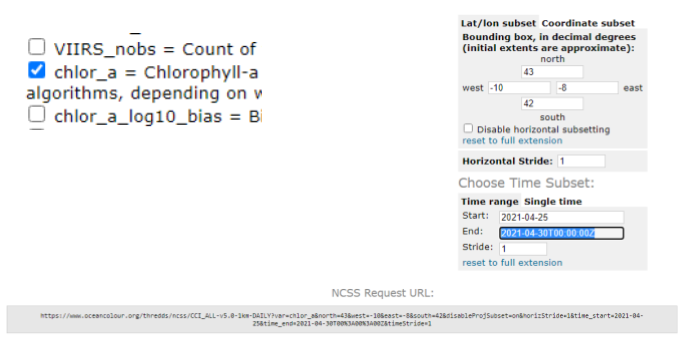

Then, simply use the linux '[wget](https://www.gnu.org/software/wget/)' command to get your subset

In [ ]:
!wget -O NW_IB_Chla_2020-2021.nc 'https://www.oceancolour.org/thredds/ncss/CCI_ALL-v5.0-1km-DAILY?var=chlor_a&north=44&west=-10&east=-8&south=40&disableProjSubset=on&horizStride=1&time_start=2020-04-30T00%3A00%3A00Z&time_end=2021-04-30T00%3A00%3A00Z&timeStride=1&accept=netcdf'

--2023-06-29 09:49:05--  https://www.oceancolour.org/thredds/ncss/CCI_ALL-v5.0-1km-DAILY?var=chlor_a&north=44&west=-10&east=-8&south=40&disableProjSubset=on&horizStride=1&time_start=2020-04-30T00%3A00%3A00Z&time_end=2021-04-30T00%3A00%3A00Z&timeStride=1&accept=netcdf
Resolving www.oceancolour.org (www.oceancolour.org)... 192.171.164.182
Connecting to www.oceancolour.org (www.oceancolour.org)|192.171.164.182|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-netcdf]
Saving to: ‘NW_IB_Chla_2020-2021.nc’

NW_IB_Chla_2020-202     [                <=> ] 103.75M  11.2MB/s    in 11s     

2023-06-29 09:49:28 (9.75 MB/s) - ‘NW_IB_Chla_2020-2021.nc’ saved [108795452]



In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_dataset('/content/NW_IB_Chla_2020-2021.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 366, lat: 385, lon: 193)
Coordinates:
  * time     (time) datetime64[ns] 2020-04-30 2020-05-01 ... 2021-04-30
  * lat      (lat) float64 43.99 43.98 43.97 43.96 ... 40.03 40.02 40.01 39.99
  * lon      (lon) float64 -9.995 -9.984 -9.974 -9.964 ... -8.016 -8.005 -7.995
Data variables:
    chlor_a  (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                       CF-1.7
    start_date:                        29-APR-2021 00:00:00.000000
    stop_date:                         29-APR-2021 23:59:00.000000
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    ...                                ...
    time_coverage_end:                 202104292359Z
    time_coverage_resolution:          P1D
    time_coverage_start:               202104290000Z
    title:                             ESA CCI Ocean Colour Product
    tracking_id:                       ccddca76-25f8-458a-a0d8-c2e632cbed59
    History:                           Translated to CF-1.0 Conventions by Ne...

In [ ]:
!wget -O mysubset.nc 'https://www.oceancolour.org/thredds/ncss/CCI_ALL-v5.0-1km-DAILY?var=chlor_a&north=43&west=-11&east=-8&south=40&horizStride=1&time_start=2021-04-01&time_end=2021-04-30T00%3A00%3A00Z&timeStride=1'

--2023-06-28 22:16:29--  https://www.oceancolour.org/thredds/ncss/CCI_ALL-v5.0-1km-DAILY?var=chlor_a&north=43&west=-11&east=-8&south=40&horizStride=1&time_start=2021-04-01&time_end=2021-04-30T00%3A00%3A00Z&timeStride=1
Resolving www.oceancolour.org (www.oceancolour.org)... 192.171.164.182
Connecting to www.oceancolour.org (www.oceancolour.org)|192.171.164.182|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-netcdf]
Saving to: ‘mysubset.nc’

mysubset.nc             [      <=>           ]   9.57M  8.46MB/s    in 1.1s    

2023-06-28 22:16:39 (8.46 MB/s) - ‘mysubset.nc’ saved [10034108]



In [ ]:
ds = xr.open_dataset('mysubset.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 30, lat: 289, lon: 289)
Coordinates:
  * time     (time) datetime64[ns] 2021-04-01 2021-04-02 ... 2021-04-30
  * lat      (lat) float64 42.99 42.98 42.97 42.96 ... 40.03 40.02 40.01 39.99
  * lon      (lon) float64 -10.99 -10.98 -10.97 -10.96 ... -8.016 -8.005 -7.995
Data variables:
    chlor_a  (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                       CF-1.7
    start_date:                        29-APR-2021 00:00:00.000000
    stop_date:                         29-APR-2021 23:59:00.000000
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    ...                                ...
    time_coverage_end:                 202104292359Z
    time_coverage_resolution:          P1D
    time_coverage_start:               202104290000Z
    title:                             ESA CCI Ocean Colour Product
    tracking_id:                       ccddca76-25f8-458a-a0d8-c2e632cbed59
    History:                           Translated to CF-1.0 Conventions by Ne...

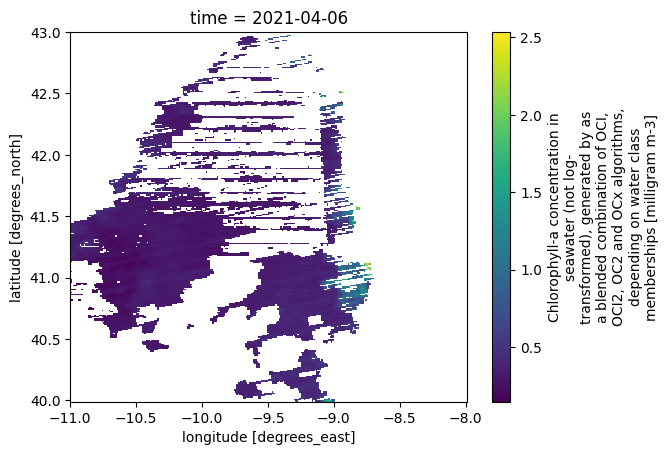

In [ ]:
ds.chlor_a.isel(time=5).plot()

Remember: - passive radiometers operating on visible wavelengths don't see through clouds...